In [4]:
import os
import time

import dill
import matplotlib.pyplot as plt
import pyro
import seaborn as sns
import torch

import pandas as pd
import pyro.distributions as dist
from chirho.dynamical.handlers import LogTrajectory
from chirho.dynamical.handlers.solver import TorchDiffEq
from chirho.dynamical.ops import simulate
from pyro.infer import Predictive
from chirho.observational.handlers import condition
from chirho.dynamical.handlers import LogTrajectory, StaticBatchObservation
from chirho.dynamical.handlers.solver import TorchDiffEq
from chirho.dynamical.ops import Dynamics, State, simulate

pyro.settings.set(module_local_params=True)

sns.set_style("white")

# Set seed for reproducibility
seed = 123
pyro.clear_param_store()
pyro.set_rng_seed(seed)

import matplotlib.pyplot as plt
import seaborn as sns
import torch

from collab.foraging import locust as lc
from collab.foraging import toolkit as ft
from collab.utils import find_repo_root, progress_saver


smoke_test = "CI" in os.environ
num_iterations = 50 if smoke_test else 100
num_samples = 20 if smoke_test else 100

In [5]:
data_code = "15EQ20191202"

starts = []
ends = []
null_mses = []
model_mses = []
rsquareds = []




for start in [0, 20, 40, 60, 80, 100 ]: 
    for end in [start + end for end in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 30, 40, 50, 60, 70, 80 ]]:
        starts.append(start)
        ends.append(end)
        print(start, end)

        locds = lc.LocustDS(data_code = data_code, 
                    start = start,
                    end = end,)
        locds.run_inference("length", 
                        num_iterations= 1500,num_samples = 100)
        
        locds.evaluate()

        null_mses.append(locds.null_mse.numpy())   
        model_mses.append(locds.mse_mean)
        rsquareds.append(locds.rsquared)
        



0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 20
0 30
0 40
0 50
0 60
0 70
0 80
20 21
20 22
20 23
20 24
20 25
20 26
20 27
20 28
20 29
20 30
20 31
20 32
20 33
20 34
20 35
20 40
20 50
20 60
20 70
20 80
20 90
20 100
40 41
40 42
40 43
40 44
40 45
40 46
40 47
40 48
40 49
40 50
40 51
40 52
40 53
40 54
40 55
40 60
40 70
40 80
40 90
40 100
40 110
40 120
60 61
60 62
60 63
60 64
60 65
60 66
60 67
60 68
60 69
60 70
60 71
60 72
60 73
60 74
60 75
60 80
60 90
60 100
60 110
60 120
60 130
60 140
80 81
80 82
80 83
80 84
80 85
80 86
80 87
80 88
80 89
80 90
80 91
80 92
80 93
80 94
80 95
80 100
80 110
80 120
80 130
80 140
80 150
80 160
100 101
100 102
100 103
100 104
100 105
100 106
100 107
100 108
100 109
100 110
100 111
100 112
100 113
100 114
100 115
100 120
100 130
100 140
100 150
100 160
100 170
100 180


2024-02-05 03:44:07,790 - No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
2024-02-05 03:44:07,819 - No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


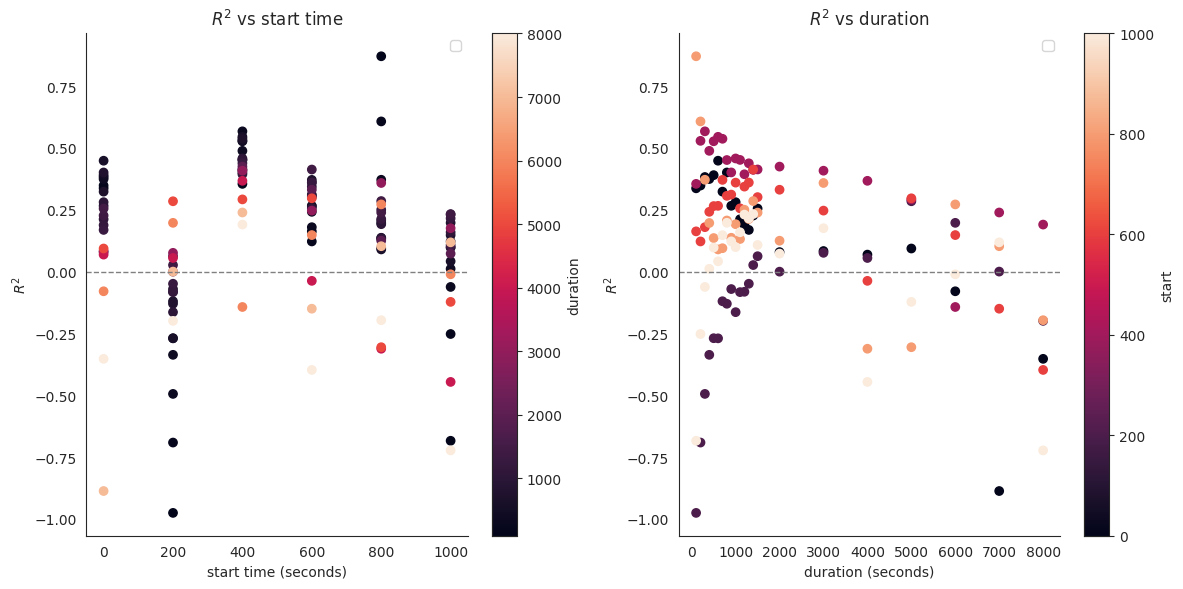

In [6]:
results = pd.DataFrame(
    {"start": [_ * 10 for _ in starts],
    "end":  [_ *10 for _ in ends],
    "null_mse":  null_mses,
    "model_mse": model_mses,
    "rsquared": rsquareds}
)

results['duration'] = [_ * 10 for _ in (results['end'] - results['start'])]

import matplotlib.pyplot as plt

# Plot against 'start'
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1) 
scatter = plt.scatter(results['start'] , results['rsquared'], marker='o', c=results['duration'])
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)


cbar = plt.colorbar(scatter, label='duration')
plt.xlabel('start time (seconds)')
plt.ylabel('$R^2$')
plt.title('$R^2$ vs start time')
sns.despine()
plt.legend()


plt.subplot(1, 2, 2)  
scatter2 = plt.scatter(results['duration'], results['rsquared'], marker='o', c=results['start'])
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)

cbar = plt.colorbar(scatter2, label='start')
plt.xlabel('duration (seconds)')
plt.ylabel('$R^2$')
plt.title('$R^2$ vs duration')
sns.despine()
plt.legend()

plt.tight_layout()  
plt.show()

data_code = "15EQ20191202"
root = find_repo_root()
results_path =  os.path.join(
            root, f"data/foraging/locust/ds/length_experiment_results_{data_code}.pkl"
        )
with open(results_path, "wb") as f:
    dill.dump(results, f)
